Covariance [[0.00028179 0.00019766]
 [0.00019766 0.00030123]]
Covariance diagonal [0.00028179 0.00030123]
Covariance trace 0.000583023549920278
[[1.00173366 0.70264666]
 [0.70264666 1.0708476 ]]
Correlation coefficient [[1.         0.67841747]
 [0.67841747 1.        ]]
Out of sync False


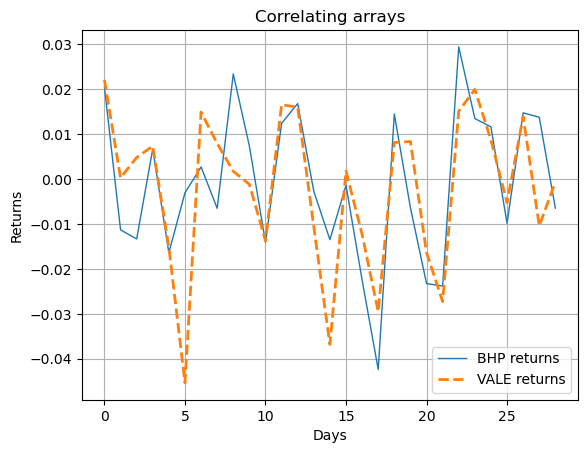

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt


bhp = np.loadtxt('BHP.csv', delimiter=',', usecols=(6,), unpack=True)

bhp_returns = np.diff(bhp) / bhp[ : -1]

vale = np.loadtxt('VALE.csv', delimiter=',', usecols=(6,), unpack=True)

vale_returns = np.diff(vale) / vale[ : -1]

covariance = np.cov(bhp_returns, vale_returns) 
print("Covariance", covariance)

print("Covariance diagonal", covariance.diagonal())
print("Covariance trace", covariance.trace())

print(covariance/ (bhp_returns.std() * vale_returns.std()))

print("Correlation coefficient", np.corrcoef(bhp_returns, vale_returns))

difference = bhp - vale
avg = np.mean(difference)
dev = np.std(difference)

print("Out of sync", np.abs(difference[-1] - avg) > 2 * dev)

t = np.arange(len(bhp_returns))
plt.plot(t, bhp_returns, lw=1, label='BHP returns')
plt.plot(t, vale_returns, '--', lw=2, label='VALE returns')
plt.title('Correlating arrays')
plt.xlabel('Days')
plt.ylabel('Returns')
plt.grid()
plt.legend(loc='best')
plt.show()


In [3]:
from __future__ import print_function
import numpy as np
import os

def load_data(filename):
    if os.path.exists(filename):
        return np.loadtxt(filename, delimiter=',', usecols=(6, 7), unpack=True)
    else:
        raise FileNotFoundError(f"File {filename} not found.")

def main():
    try:
        c, v = load_data('BHP.csv')
    except FileNotFoundError as e:
        print(e)
        return

    # Compute daily changes in closing prices
    change = np.diff(c)
    print("Change:", change)

    # Compute signs using np.sign
    signs = np.sign(change)
    print("Signs:", signs)

    # Compute signs using np.piecewise
    pieces = np.piecewise(change, [change < 0, change > 0], [-1, 1])
    print("Pieces:", pieces)

    # Compare np.sign and np.piecewise results
    print("Arrays equal?", np.array_equal(signs, pieces))

    # Calculate On Balance Volume (OBV)
    obv = v[1:] * signs
    print("On balance volume:", obv)

# Run the main function
if __name__ == "__main__":
    main()


Change: [ 1.92 -1.08 -1.26  0.63 -1.54 -0.28  0.25 -0.6   2.15  0.69 -1.33  1.16
  1.59 -0.26 -1.29 -0.13 -2.12 -3.91  1.28 -0.57 -2.07 -2.07  2.5   1.18
  1.03 -0.88  1.31  1.24 -0.59]
Signs: [ 1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1.
  1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.]
Pieces: [ 1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1.
  1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.]
Arrays equal? True
On balance volume: [ 2620800. -2461300. -3270900.  2650200. -4667300. -5359800.  7768400.
 -4799100.  3448300.  4719800. -3898900.  3727700.  3379400. -2463900.
 -3590900. -3805000. -3271700. -5507800.  2996800. -3434800. -5008300.
 -7809799.  3947100.  3809700.  3098200. -3500200.  4285600.  3918800.
 -3632200.]


Polynomial fit coefficients: [ 1.11655581e-03 -5.28581762e-02  5.80684638e-01  5.79791202e+01]
Next value prediction: 57.97430760810075
Polynomial roots: [ 35.48624287+30.62717062j  35.48624287-30.62717062j
 -23.63210575 +0.j        ]
Derivative coefficients: [ 0.00334967 -0.10571635  0.58068464]
Extrema points: [24.47820054  7.08205278]
Index of maximum value: 7
Index of minimum value: 24


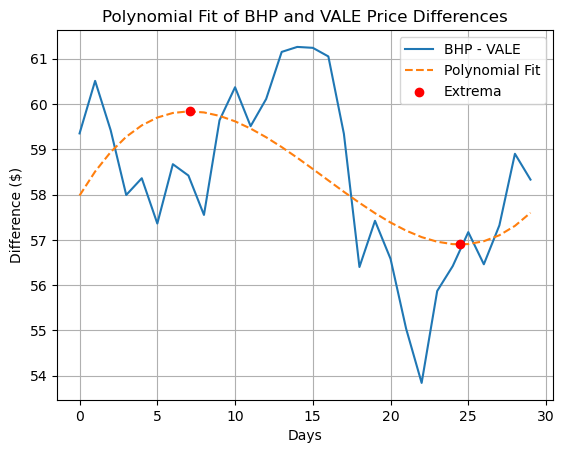

In [5]:
from __future__ import print_function
import numpy as np
import sys
import matplotlib.pyplot as plt

def load_data(filename):
    try:
        return np.loadtxt(filename, delimiter=',', usecols=(6,), unpack=True)
    except IOError as e:
        print(f"Error loading {filename}: {e}")
        sys.exit(1)

def main():
    bhp = load_data('BHP.csv')
    vale = load_data('VALE.csv')

    t = np.arange(len(bhp))
    price_diff = bhp - vale

    # Polynomial fit of degree 3
    poly = np.polyfit(t, price_diff, 3)
    print("Polynomial fit coefficients:", poly)

    # Predict the next value
    next_value = np.polyval(poly, t[-1] + 1)
    print("Next value prediction:", next_value)

    # Roots of the polynomial
    roots = np.roots(poly)
    print("Polynomial roots:", roots)

    # Derivative and extrema
    derivative = np.polyder(poly)
    print("Derivative coefficients:", derivative)
    extrema = np.roots(derivative)
    print("Extrema points:", extrema)

    # Evaluate polynomial fit
    fit_values = np.polyval(poly, t)

    # Find max and min
    max_index = np.argmax(fit_values)
    min_index = np.argmin(fit_values)
    print("Index of maximum value:", max_index)
    print("Index of minimum value:", min_index)

    # Plotting
    plt.plot(t, price_diff, label='BHP - VALE')
    plt.plot(t, fit_values, '--', label='Polynomial Fit')
    plt.scatter(extrema, np.polyval(poly, extrema), color='red', zorder=5, label='Extrema')
    plt.title('Polynomial Fit of BHP and VALE Price Differences')
    plt.xlabel('Days')
    plt.ylabel('Difference ($)')
    plt.grid()
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


In [7]:
from __future__ import print_function
import numpy as np

# Load open, high, low, and close prices from CSV file
o, h, l, c = np.loadtxt('BHP.csv', delimiter=',', usecols=(3, 4, 5, 6), unpack=True)

def calc_profit(open, high, low, close):
    """Calculate profit based on a buy strategy where the buy price is just below the open price."""
    buy = open * 0.999  # Buy just below the open price

    # Check if buy price is within the daily range
    if low < buy < high:
        return (close - buy) / buy
    else:
        return 0

# Vectorize the profit calculation function
func = np.vectorize(calc_profit)
profits = func(o, h, l, c)
print("Profits:", profits)

# Filter out real trades where profit is not zero
real_trades = profits[profits != 0]
print("Number of trades:", len(real_trades), f"{round(100.0 * len(real_trades) / len(c), 2)}%")
print("Average profit/loss %:", round(np.mean(real_trades) * 100, 2))

# Filter out winning trades where profit is positive
winning_trades = profits[profits > 0]
print("Number of winning trades:", len(winning_trades), f"{round(100.0 * len(winning_trades) / len(c), 2)}%")
print("Average profit %:", round(np.mean(winning_trades) * 100, 2))

# Filter out losing trades where profit is negative
losing_trades = profits[profits < 0]
print("Number of losing trades:", len(losing_trades), f"{round(100.0 * len(losing_trades) / len(c), 2)}%")
print("Average loss %:", round(np.mean(losing_trades) * 100, 2))


Profits: [ 0.00755895  0.0123267   0.0021668   0.00780612  0.          0.00154302
 -0.01006869  0.00568316 -0.00614746  0.00560552 -0.00121617 -0.01774473
  0.00675817  0.00225356 -0.00274807 -0.02015786  0.00762307 -0.00675369
 -0.00675957  0.          0.01065112  0.02904986 -0.01558377  0.00168882
 -0.0098442  -0.00499634 -0.00783465  0.00603003  0.00540779  0.00376864]
Number of trades: 28 93.33%
Average profit/loss %: 0.02
Number of winning trades: 16 53.33%
Average profit %: 0.72
Number of losing trades: 12 40.0%
Average loss %: -0.92


Weights: [0.         0.1882551  0.61126047 0.95048443 0.95048443 0.61126047
 0.1882551  0.        ]
Intersection points: [27.73321597+0.j         27.51284094+0.j         24.32064343+0.j
 18.86423973+0.j         12.4379719 +1.73218179j 12.4379719 -1.73218179j
  6.34613053+0.62519463j  6.34613053-0.62519463j]
Real number? [ True  True  True  True False False False False]
Real intersection points: [27.73321597 27.51284094 24.32064343 18.86423973  0.          0.
  0.          0.        ]
Sans 0s: [27.73321597 27.51284094 24.32064343 18.86423973]


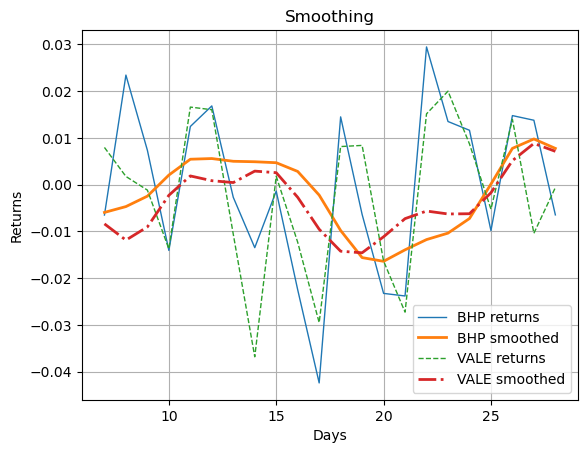

In [9]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

# Set the smoothing window size
N = 8

# Create Hanning weights for smoothing
weights = np.hanning(N)
print("Weights:", weights)

# Load BHP closing prices and calculate returns
bhp = np.loadtxt('BHP.csv', delimiter=',', usecols=(6,), unpack=True)
bhp_returns = np.diff(bhp) / bhp[:-1]

# Smooth the BHP returns
smooth_bhp = np.convolve(weights / weights.sum(), bhp_returns)[N-1:-N+1]

# Load VALE closing prices and calculate returns
vale = np.loadtxt('VALE.csv', delimiter=',', usecols=(6,), unpack=True)
vale_returns = np.diff(vale) / vale[:-1]

# Smooth the VALE returns
smooth_vale = np.convolve(weights / weights.sum(), vale_returns)[N-1:-N+1]

# Define the polynomial degree for fitting
K = 8

# Define the time axis for plotting
t = np.arange(N - 1, len(bhp_returns))

# Fit polynomials to the smoothed returns
poly_bhp = np.polyfit(t, smooth_bhp, K)
poly_vale = np.polyfit(t, smooth_vale, K)

# Subtract the two polynomials to find intersection points
poly_sub = np.polysub(poly_bhp, poly_vale)
xpoints = np.roots(poly_sub)
print("Intersection points:", xpoints)

# Filter out non-real intersection points
reals = np.isreal(xpoints)
print("Real number?", reals)

xpoints = np.select([reals], [xpoints])
xpoints = xpoints.real
print("Real intersection points:", xpoints)

# Remove zeros from the intersection points
print("Sans 0s:", np.trim_zeros(xpoints))

# Plotting the results
plt.plot(t, bhp_returns[N-1:], lw=1.0, label='BHP returns')
plt.plot(t, smooth_bhp, lw=2.0, label='BHP smoothed')

plt.plot(t, vale_returns[N-1:], '--', lw=1.0, label='VALE returns')
plt.plot(t, smooth_vale, '-.', lw=2.0, label='VALE smoothed')

plt.title('Smoothing')
plt.xlabel('Days')
plt.ylabel('Returns')
plt.grid()
plt.legend(loc='best')
plt.show()
